In [1]:
import sys
sys.path.append('/glade/u/home/jzweifel/utils')
from load_variable import load_variable_for_all_years
from matplotlib import pyplot as plt
import calendar
import xarray as xr

In [2]:
FSNTOA = load_variable_for_all_years('h0', 'FSNTOA')
FSNTOA_d1 = load_variable_for_all_years('h0', 'FSNTOA_d1')
FSNTOA_d2 = load_variable_for_all_years('h0', 'FSNTOA_d2')
FSNTOAC = load_variable_for_all_years('h0', 'FSNTOAC');
FSNTOAC_d1 = load_variable_for_all_years('h0', 'FSNTOAC_d1');
FSNTOAC_d2 = load_variable_for_all_years('h0', 'FSNTOAC_d2');

In [3]:
def months_select(data, months):
    return data.sel(time=data.time.dt.month.isin(months))

def direct_radiative_effect(year_1):
    return FSNTOA[year_1] - FSNTOA_d2[year_1]

def cloud_radiative_effect(year_1):
    return FSNTOA_d2[year_1] - FSNTOAC_d2[year_1]

In [4]:
forcing_direct = direct_radiative_effect('2006') - direct_radiative_effect('1970')

forcing_cloud = cloud_radiative_effect('2006') - cloud_radiative_effect('1970')

forcing_albedo = FSNTOAC_d2['2006'] - FSNTOAC_d2['1970']

In [7]:
NPAC_mask = xr.open_dataarray('/glade/u/home/jzweifel/jupyter_workspaces/Masters_paper_analysis/Figure_1/NPO_lower_bound_20_deg.nc')
NPAC_mask = NPAC_mask.where(NPAC_mask>0)

AREA = xr.open_dataarray('/glade/derecho/scratch/jzweifel/Regional_Masks_And_Area/area_files/AREA.nc')

area_weighted_NPAC_mask = (((NPAC_mask * AREA))/ (NPAC_mask*AREA).mean())

In [8]:
def make_climatology(dataset):
    climatology = (dataset * area_weighted_NPAC_mask).groupby('time.month').mean(dim=['time', 'lat', 'lon'])
    return climatology

In [9]:
direct_forcing_climo = make_climatology(forcing_direct)
cloud_forcing_climo = make_climatology(forcing_cloud)
albedo_forcing_climo = make_climatology(forcing_albedo)
total_forcing_climo = make_climatology((forcing_albedo+forcing_cloud+forcing_albedo))

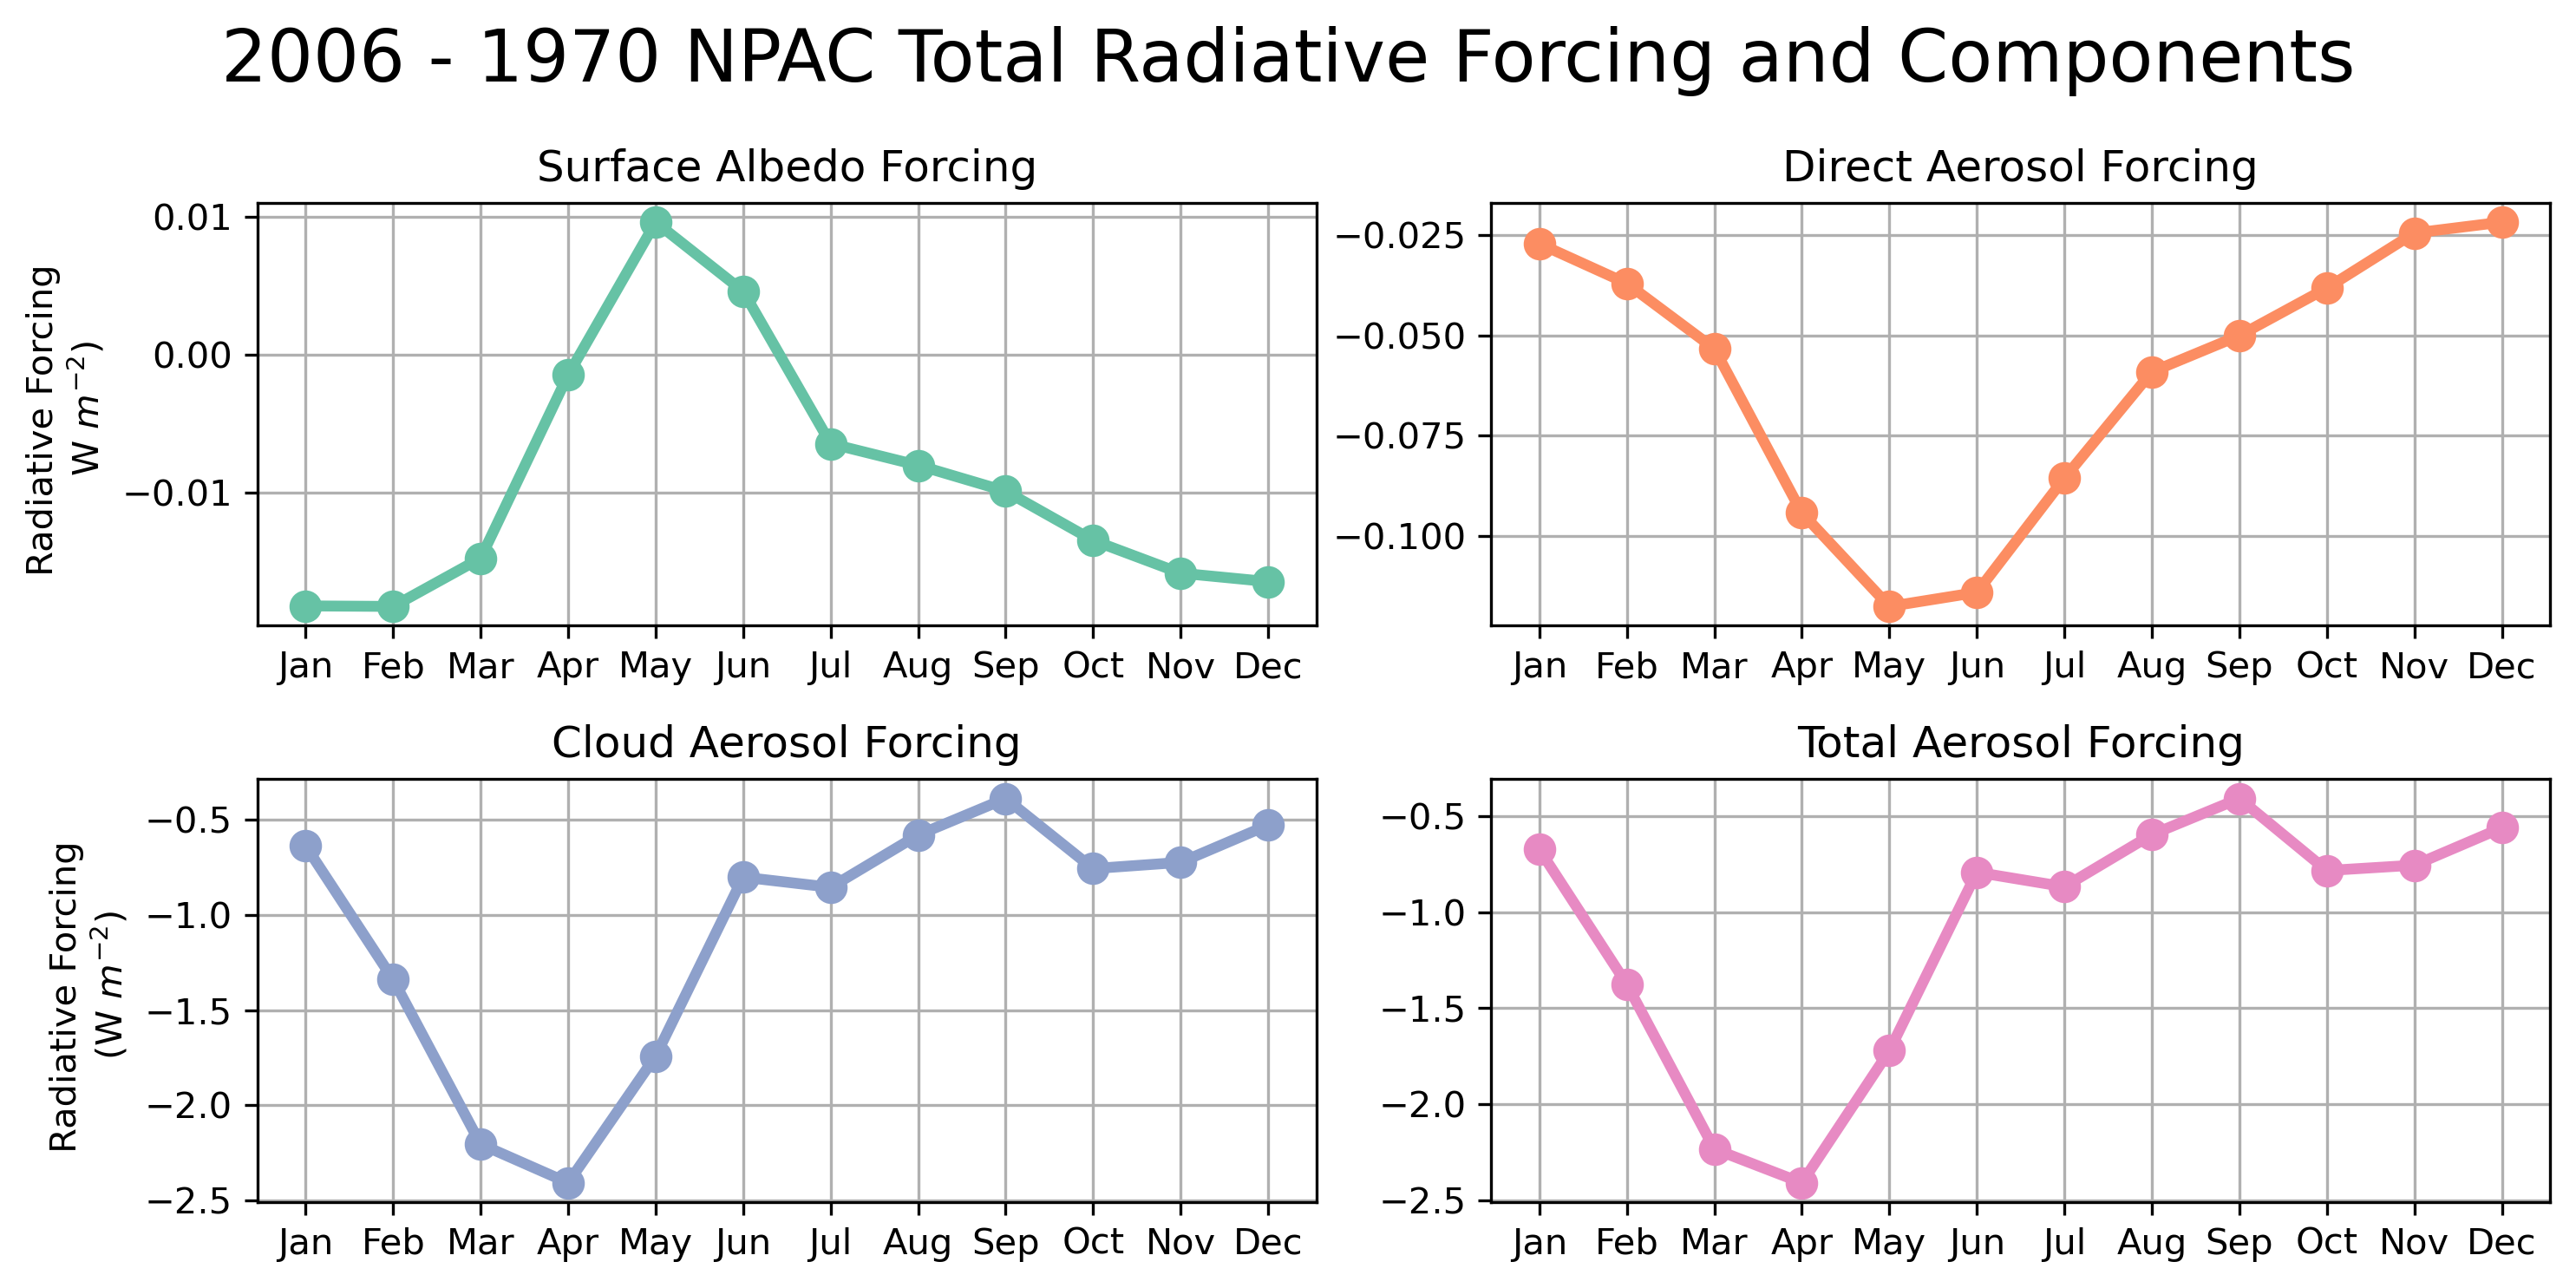

In [10]:
import calendar
import seaborn as sns

months = calendar.month_abbr[1:]
color_palette = sns.color_palette("Set2")

fig, axs = plt.subplots(2,2, figsize=(10,5), dpi=300)

axs[0,0].plot(months, albedo_forcing_climo.roll(month=-1), marker='o', markersize=8, color=color_palette[0], lw=3)
axs[0,0].set_ylabel('Radiative Forcing \n W $m^{-2}$)')
axs[0,0].set_title('Surface Albedo Forcing')
axs[0,0].grid()
axs[0,1].plot(months, direct_forcing_climo.roll(month=-1), marker='o', markersize=8, color=color_palette[1], lw=3)
axs[0,1].set_title('Direct Aerosol Forcing')
axs[0,1].grid()
axs[1,0].plot(months, cloud_forcing_climo.roll(month=-1), marker='o', markersize=8, color=color_palette[2], lw=3)
axs[1,0].set_ylabel('Radiative Forcing \n (W $m^{-2}$)')
axs[1,0].set_title('Cloud Aerosol Forcing')
axs[1,0].grid()
axs[1,1].plot(months, total_forcing_climo.roll(month=-1), marker='o', markersize=8, color=color_palette[3], lw=3)
axs[1,1].set_title('Total Aerosol Forcing')
axs[1,1].grid()

fig.suptitle('2006 - 1970 NPAC Total Radiative Forcing and Components', fontsize=20)
plt.tight_layout()

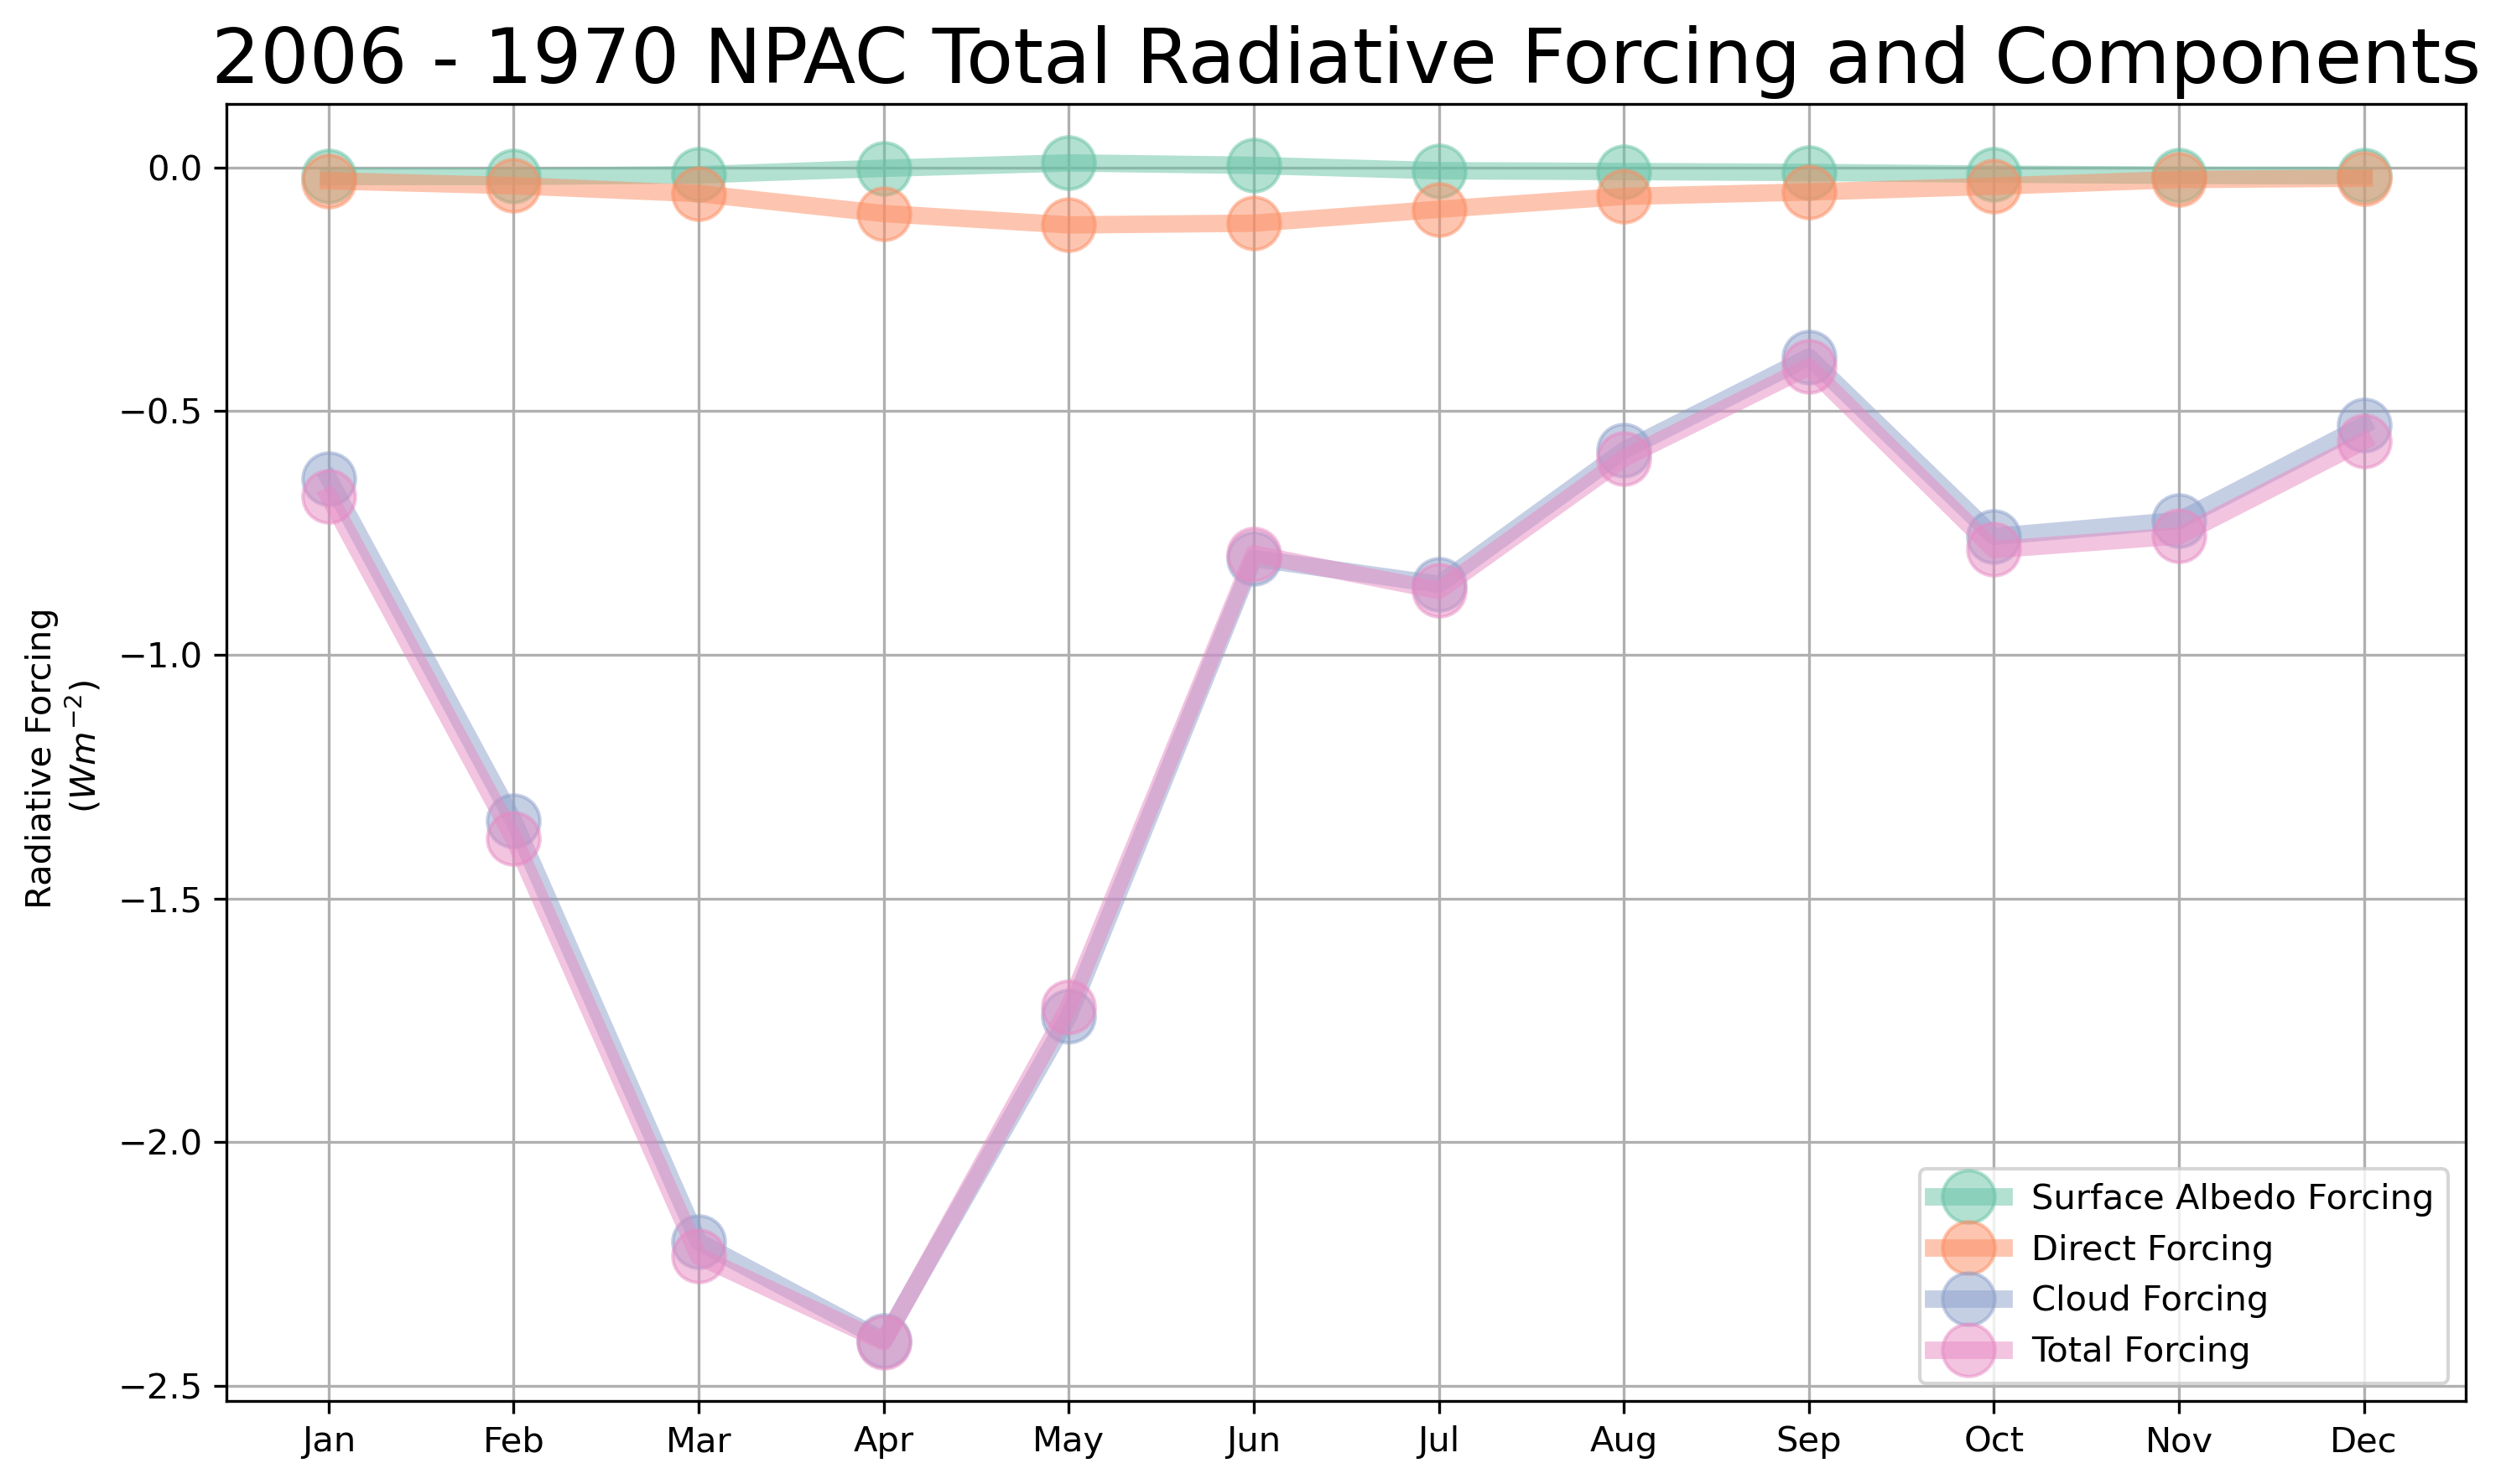

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)  # Optional: adjust size to make it look nice at high DPI

plt.plot(months, albedo_forcing_climo.roll(month=-1), marker='o', markersize=15, lw=5, alpha=0.5, label='Surface Albedo Forcing', color=color_palette[0])
plt.plot(months, direct_forcing_climo.roll(month=-1), marker='o', markersize=15, lw=5, alpha=0.5, label='Direct Forcing', color=color_palette[1])
plt.plot(months, cloud_forcing_climo.roll(month=-1), marker='o', markersize=15, lw=5, alpha=0.5, label='Cloud Forcing', color=color_palette[2])
plt.plot(months, total_forcing_climo.roll(month=-1), marker='o', markersize=15, lw=5, alpha=0.5, label='Total Forcing', color=color_palette[3])

plt.grid()
plt.ylabel('Radiative Forcing \n ($W m^{-2}$)')
plt.title('2006 - 1970 NPAC Total Radiative Forcing and Components', fontsize=22)
plt.legend()

plt.tight_layout()  # Makes sure labels and titles don't get cut off
plt.show()  # Show it on screen as usual